# Convolutional Neural Network

### Packages

In [2]:
# ----- Tensorflow -----
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import regularizers as reg
from keras import optimizers
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

from keras.layers import Input, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate, AveragePooling2D, Rescaling

# ----- Utility functions -----
from utils import load_data, plot_hist

c:\Users\gusta\OneDrive\Skrivebord\Data Science\3. Semester - Data Science\Anvendt Maskinlæring\applied_ML_faelles\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Data

In [ ]:
#data_dir = 'Users\gusta\OneDrive\Skrivebord\Data Science\3. Semester - Data Science\Anvendt Maskinlæring'
data_dir = 'C:/Users/gusta/OneDrive/Skrivebord/Data Science/3. Semester - Data Science/Anvendt Maskinlæring/patch_camelyon'
BATCH_SIZE = 32
train, test, val = load_data(data_dir, perc=5, batch_size=BATCH_SIZE)

### Architectures
- Consider and discuss alternative CNN model architectures

Before we begin building complex architectures for the CNN model, we must establish a baseline classifier which we will attempt to beat. This common-sense baseline will tell us if we are moving in the right direction. In our case, we can choose a simple random classifier with a threshold of 0.5 since we have a binary classification problem where half of the samples belong to class A and the remaining 50% belong to class B. We could also specify a 'simple' machine learning algorithm as a baseline, but although we do not do this explicitly, we will aim to beat the trained models in question 1 as CNNs has some properties that make them superior to non-deep learning algorithms and feedforward neural networks (Chollet, 2021).

At this point, the first thing we want to achieve is statistical power, i.e. to cross the threshold of our baseline classifier by developing a small model. To do so, we focus on parameters such as the loss function, batch_size, learning rate, etc. Due to the way we represent the labels, we will use the softmax activation and the loss function categorical crossentropy rather than sigmoid and binary crossentropy, however, this will not change the results of our models.

In [23]:
# ----- Relatively Simple Convnet from DLPR -----
inputs = Input(shape=(96, 96, 3))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(2, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

# ----- Model summary -----
model.summary()

# ----- Configure model -----
model.compile(optimizer='adam',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train,
					epochs = 20,
					validation_data= val)

# ----- Plot performance -----
plot_hist(history)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 20, 20, 128)       7385

KeyboardInterrupt: 

- Learning Rates
    - Too small --> too many iterations and we could get stuck in a local minimum. 
        - Avoid by using momentum
    - Too large --> random locations on loss curve

"The learning rate is perhaps the most important hyperparameter. If you have time to tune only one hyperparameter, tune the learning rate." (Goodfellow et al., 2016: 424)

Although the CNN has some level of generalization power, the results clearly show that the model is overfitting; despite that the training loss is decreasing, the validation is now increasing. This is a good sign in the sense that the model has sufficient representation power for the problem (Chollet, 2021).

- What is overfitting and how can we mitigate it?

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 20, 20, 128)       738

KeyboardInterrupt: 

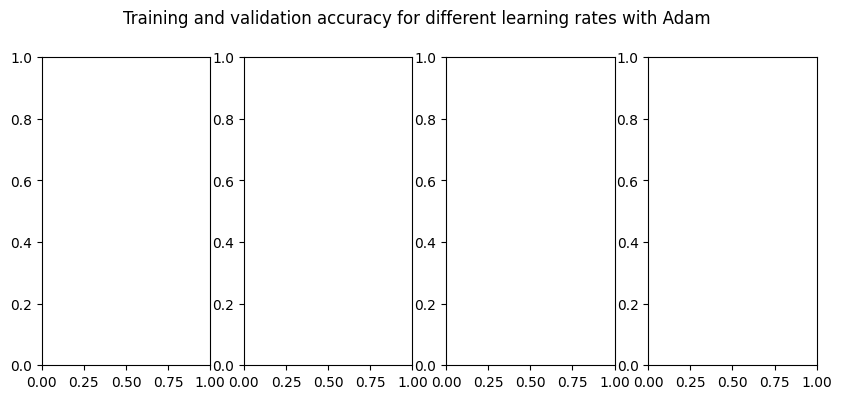

In [28]:
# ----- Relatively Simple Convnet from DLPR with different learning rates -----
inputs = Input(shape=(96, 96, 3))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(2, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

# ----- Model summary -----
model.summary()

# ----- Learning rates -----
learning_rates = [0.1, 0.01, 0.001, 0.0001]
momentum = [0.99, 0.9]
nesterov = [True, False]


# ------------------------------------------------------------ BREAK ------------------------------------------------------------

# ----- Define subplot grid -----
fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(10, 4))
plt.subplots_adjust(hspace=0.8)
fig.suptitle("Training and validation accuracy for different learning rates with Adam", fontsize=12, y=1)

# Try different learning rates for Adam optimizer
for i in range(len(learning_rates)):
	opt = tf.keras.optimizers.Adam(learning_rate=learning_rates[i])
	print(learning_rates[i])
	# ----- Configure model -----
	model.compile(optimizer=opt,
			  	loss='categorical_crossentropy',
			  metrics=['accuracy'])

	# ----- Train model -----
	history = model.fit(train,
						epochs=20,
						validation_data=val)

	# ----- Plot performance -----
	acc = history.history['accuracy']
	val_acc = history.history['val_accuracy']
	epochs = range(1, len(acc) + 1)

	axis[i].plot(epochs, acc, label='Training accuracy')
	axis[i].plot(epochs, val_acc, label='Validation accuracy')
	axis[i].set_title('lr='+str(learning_rates[i]))

plt.show()

Epoch 1/2
82/82 [==============================] - 11s 127ms/step - loss: 0.7015 - accuracy: 0.4994 - val_loss: 0.6895 - val_accuracy: 0.5549
Epoch 2/2
82/82 [==============================] - 10s 124ms/step - loss: 0.7002 - accuracy: 0.5002 - val_loss: 0.6892 - val_accuracy: 0.5549
Epoch 1/2
82/82 [==============================] - 10s 121ms/step - loss: 0.7133 - accuracy: 0.5010 - val_loss: 0.6877 - val_accuracy: 0.5549
Epoch 2/2
82/82 [==============================] - 10s 121ms/step - loss: 0.7256 - accuracy: 0.4937 - val_loss: 0.6909 - val_accuracy: 0.5549
Epoch 1/2
82/82 [==============================] - 11s 125ms/step - loss: 0.6968 - accuracy: 0.5093 - val_loss: 0.6918 - val_accuracy: 0.5549
Epoch 2/2
82/82 [==============================] - 10s 126ms/step - loss: 0.6965 - accuracy: 0.5093 - val_loss: 0.6918 - val_accuracy: 0.5549
Epoch 1/2
82/82 [==============================] - 10s 122ms/step - loss: 0.6981 - accuracy: 0.5010 - val_loss: 0.6894 - val_accuracy: 0.5549
Epoch 

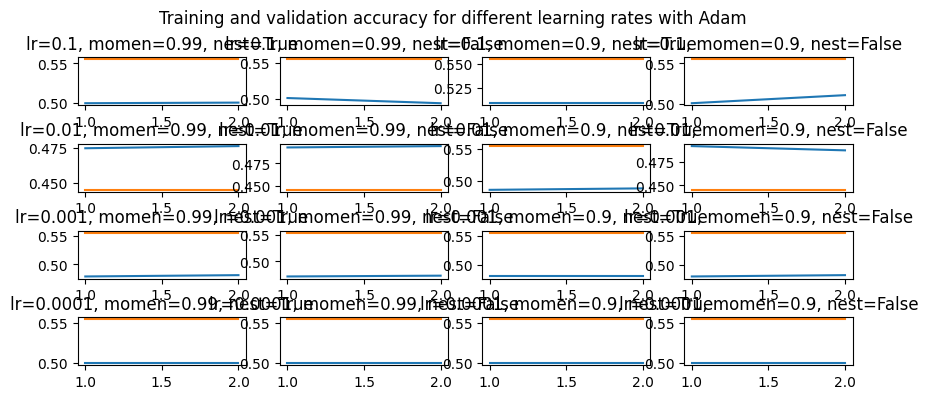

In [17]:
# ------------------------------------------------------------ BREAK ------------------------------------------------------------

# ----- Define subplot grid -----
fig, axis = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
plt.subplots_adjust(hspace=0.8)
fig.suptitle("Training and validation accuracy for different learning rates with Adam", fontsize=12, y=1)

t=1
# Try different learning rates, momentum, and nesterov for SGD optimizer
for i in range(len(learning_rates)):
	for m in range(len(momentum)):
		for n in range(len(nesterov)):

			opt = tf.keras.optimizers.SGD(learning_rate=learning_rates[i],
										  momentum=momentum[m],
										  nesterov=nesterov[n])

			# ----- Configure model -----
			model.compile(optimizer=opt,
						loss='categorical_crossentropy',
					metrics=['accuracy'])

			# ----- Train model -----
			history = model.fit(train,
								epochs=20,
								validation_data=val)

			# ----- Plot performance -----
			acc = history.history['accuracy']
			val_acc = history.history['val_accuracy']
			epochs = range(1, len(acc) + 1)

			axis = plt.subplot(4, 4, t)
			axis.plot(epochs, acc, label='Training accuracy')
			axis.plot(epochs, val_acc, label='Validation accuracy')
			axis.set_title('lr=' + str(learning_rates[i]) + ', momen=' + str(momentum[m]) + ', nest=' + str(nesterov[n]))
			t=t+1

plt.show()

- Write something about the batch size

In [ ]:
# Batch size changes here

## Data Augmentation
- Visualize impact on training/validation losses and accuracies
- Discuss data augmentation and its relation to overfitting